In [1]:
import numpy as np
import pandas as pd


In [2]:
# pip install numpy
!pip install pandas

In [3]:
email = pd.read_csv("email.csv")

In [4]:
email.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
email.shape

(5573, 2)

In [6]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [7]:
# data cleaning

email.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


####  duplicate value

In [8]:
email.duplicated().sum()

415

In [9]:
email.drop_duplicates(inplace=True)

In [10]:
email.shape

(5158, 2)

In [11]:
email.reset_index(inplace=True)

In [12]:
email.drop(columns=["index"],inplace=True)

#### dividing spam and ham messages

In [13]:
!pip install scikit-learn

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
email["Category"].value_counts()      
# one invalid data present here

Category
ham               4516
spam               641
{"mode":"full"       1
Name: count, dtype: int64

In [16]:
encoder = LabelEncoder()
email["Category"] = encoder.fit_transform(email["Category"])


In [17]:
email.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
email.shape

(5158, 2)

In [19]:
# invalid data present in last 
email.tail()

,Category,Message
5153,0,Will ü b going to esplanade fr home?
5154,0,"Pity, * was in mood for that. So...any other s..."
5155,0,The guy did some bitching but I acted like i'd...
5156,0,Rofl. Its true to its name
5157,2,isActive:false}


In [20]:
email.Category.value_counts()

Category
0    4516
1     641
2       1
Name: count, dtype: int64

In [21]:
# invalid data
email[email["Category"] == 2]

,Category,Message
5157,2,isActive:false}


In [22]:
# now drop invalid data from our dataset
email = email.iloc[:5157,:]

In [23]:
email.Category.value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

### **Data preprocessing and EDA**

In [24]:
!pip install matplotlib
!pip install seaborn

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

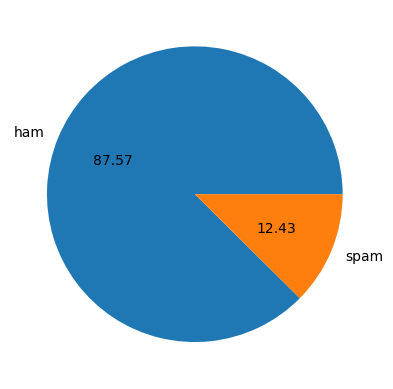

In [26]:
plt.pie(email["Category"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

#### using nlp operations

In [27]:
!pip install nltk

In [28]:
import nltk

In [29]:
email["num_character"] = email["Message"].apply(len)

In [30]:
email

,Category,Message,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5152,1,This is the 2nd time we have tried 2 contact u...,160
5153,0,Will ü b going to esplanade fr home?,36
5154,0,"Pity, * was in mood for that. So...any other s...",57
5155,0,The guy did some bitching but I acted like i'd...,125


In [31]:
email["num_word"] = email["Message"].apply(lambda x : len(nltk.word_tokenize(x)))

In [32]:
email

,Category,Message,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5152,1,This is the 2nd time we have tried 2 contact u...,160,35
5153,0,Will ü b going to esplanade fr home?,36,9
5154,0,"Pity, * was in mood for that. So...any other s...",57,15
5155,0,The guy did some bitching but I acted like i'd...,125,27


In [33]:
email["num_sentance"] = email["Message"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [34]:
email

,Category,Message,num_character,num_word,num_sentance
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5152,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5153,0,Will ü b going to esplanade fr home?,36,9,1
5154,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5155,0,The guy did some bitching but I acted like i'd...,125,27,1


In [35]:
email.describe()

,Category,num_character,num_word,num_sentance
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


<Axes: xlabel='num_character', ylabel='Count'>

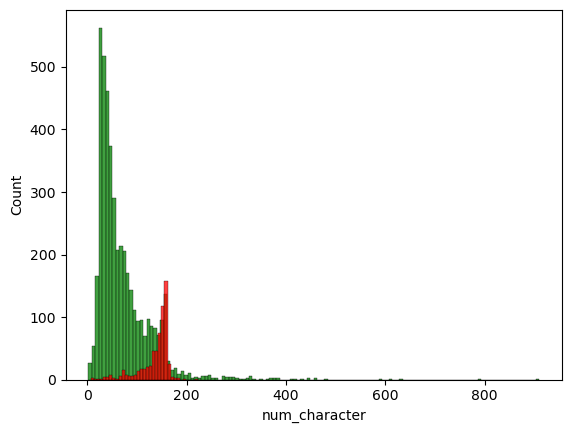

In [37]:

sns.histplot(email[email["Category"] == 0]["num_character"],color="green")
sns.histplot(email[email["Category"] == 1]["num_character"],color="red")

<Axes: xlabel='num_word', ylabel='Count'>

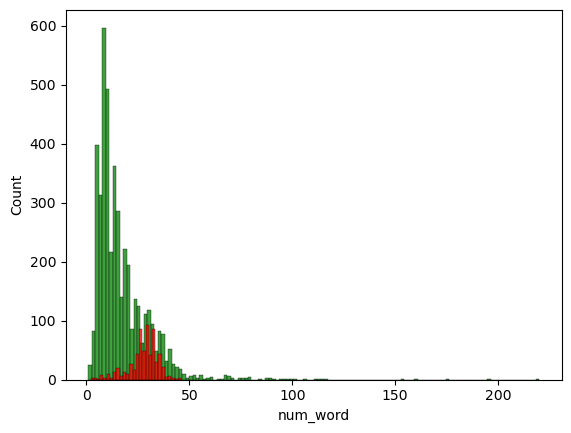

In [38]:

sns.histplot(email[email["Category"] == 0]["num_word"],color="green")
sns.histplot(email[email["Category"] == 1]["num_word"],color="red")

<Axes: xlabel='num_sentance', ylabel='Count'>

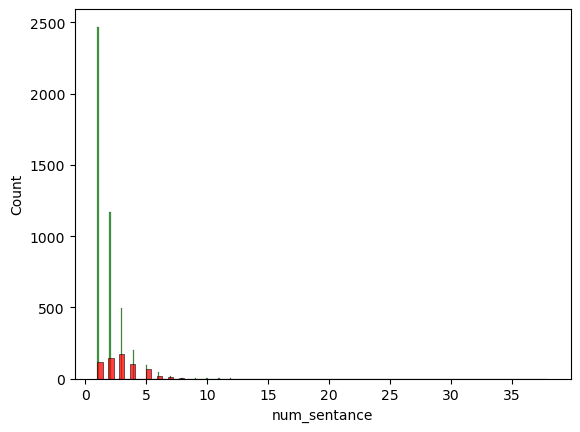

In [39]:

sns.histplot(email[email["Category"] == 0]["num_sentance"],color="green")
sns.histplot(email[email["Category"] == 1]["num_sentance"],color="red")

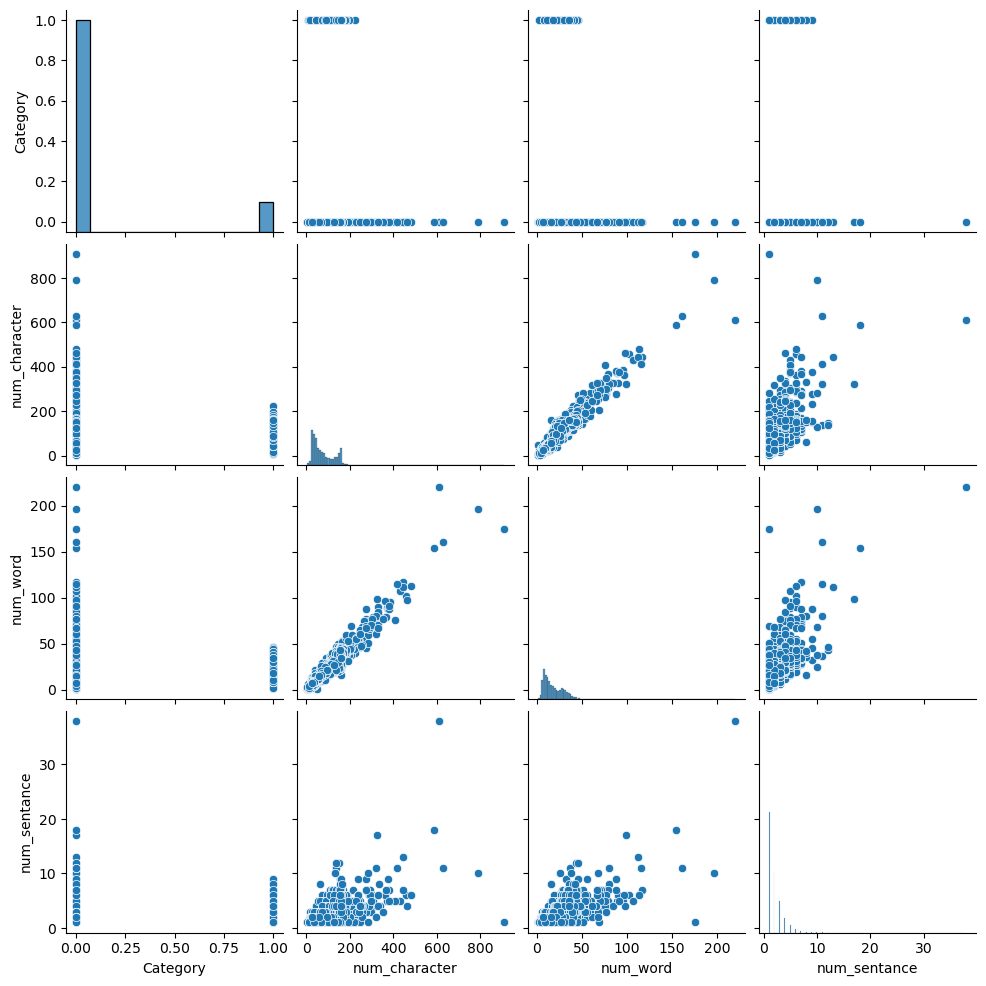

In [40]:
sns.pairplot(email)

<Axes: >

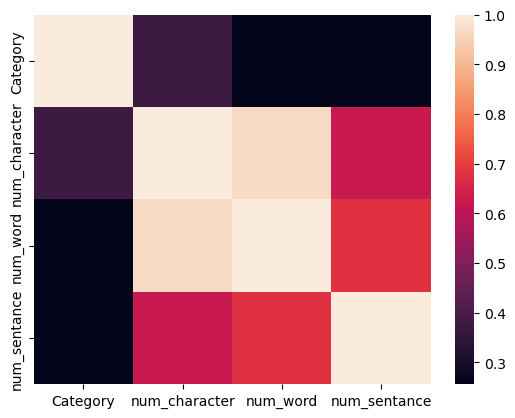

In [41]:
sns.heatmap(email.corr(numeric_only=True))

### **NLP operation**

Lower case                                                           
Tokenization                                                  
Removing special characters                                               
Removing stop words and punctuation                                                  
Stemming          

In [42]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/suraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.stem import PorterStemmer
import string
stemmer = PorterStemmer()

In [44]:

def transform_text(text):

    # convert onto lowercase
    text = text.lower()

    # word tokinization
    text = nltk.word_tokenize(text)

    # remove penchuation and stopwords
    y = []

    for word in text:
        if word.isalnum():
            y.append(word)

    
    text = y.copy()
    y.clear()


    
    for word in text:
        if word not in stopwords.words("english")  or word not in string.punctuation:
            y.append(word)
    
    # print(y)
    text = y.copy()
    y.clear()

    # now stem thw word
    for word in text:
        y.append(stemmer.stem(word))

    return " ".join(y)

    


    

In [45]:
transform_text("Go until jurong pointing, crazy.. Available only .....")

'go until jurong point crazi avail onli'

In [46]:
stemmer.stem("going")

'go'

In [47]:
nltk.word_tokenize("Go until jurong point, crazy.. Available only")

['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only']

In [48]:
email["transformed_msg"] = email["Message"].apply(transform_text)

In [49]:
email

,Category,Message,num_character,num_word,num_sentance,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...
...,...,...,...,...,...,...
5152,1,This is the 2nd time we have tried 2 contact u...,160,35,4,thi is the 2nd time we have tri 2 contact u ha...
5153,0,Will ü b going to esplanade fr home?,36,9,1,will ü b go to esplanad fr home
5154,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti wa in mood for that so ani other suggest
5155,0,The guy did some bitching but I acted like i'd...,125,27,1,the guy did some bitch but i act like i be int...


In [50]:
email.drop("Message",axis=1,inplace=True)

In [51]:
email

,Category,num_character,num_word,num_sentance,transformed_msg
0,0,111,24,2,go until jurong point crazi avail onli in bugi...
1,0,29,8,2,ok lar joke wif u oni
2,1,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,49,13,1,u dun say so earli hor u c alreadi then say
4,0,61,15,1,nah i do think he goe to usf he live around he...
...,...,...,...,...,...
5152,1,160,35,4,thi is the 2nd time we have tri 2 contact u ha...
5153,0,36,9,1,will ü b go to esplanad fr home
5154,0,57,15,2,piti wa in mood for that so ani other suggest
5155,0,125,27,1,the guy did some bitch but i act like i be int...


In [52]:
!pip install wordcloud

In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height = 500, min_font_size=10,background_color="black")


In [54]:
wc_img = wc.generate(email[email["Category"] == 0]["transformed_msg"].str.cat(sep = " "))

Text(0.5, 1.0, 'Word cloud for ham messages')

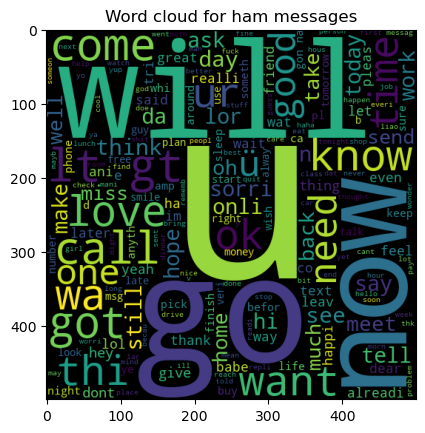

In [55]:
plt.imshow(wc_img)
plt.title("Word cloud for ham messages")

In [56]:
wc_img2 = wc.generate(email[email["Category"] == 1]["transformed_msg"].str.cat(sep = " "))

Text(0.5, 1.0, 'Word cloud for ham messages')

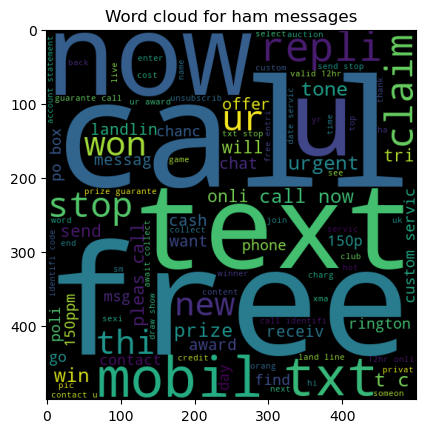

In [57]:
plt.imshow(wc_img2)
plt.title("Word cloud for ham messages")

In [58]:
## different-different corpus
ham_corpus = []
for msg in email[email["Category"]==0]["transformed_msg"].tolist():
    for word in msg.split():
        ham_corpus.append(word)


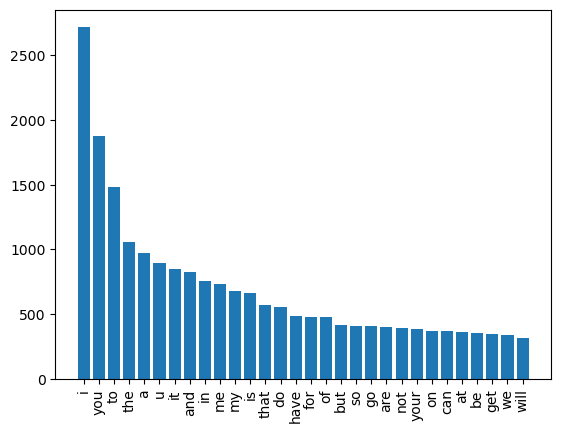

In [59]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [60]:
## different-different corpus
spam_corpus = []
for msg in email[email["Category"]==1]["transformed_msg"].tolist():
    for word in msg.split():
        spam_corpus.append(word)


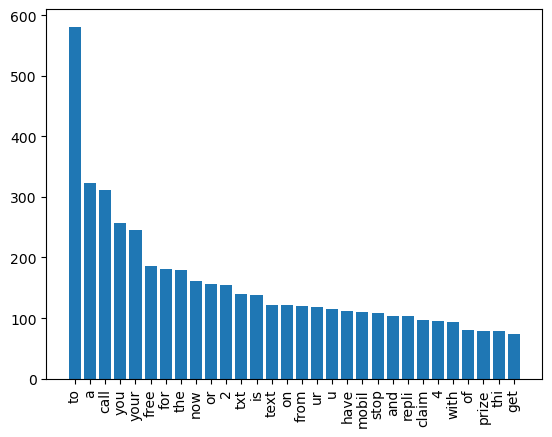

In [61]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [62]:
email.head()

,Category,num_character,num_word,num_sentance,transformed_msg
0,0,111,24,2,go until jurong point crazi avail onli in bugi...
1,0,29,8,2,ok lar joke wif u oni
2,1,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,49,13,1,u dun say so earli hor u c alreadi then say
4,0,61,15,1,nah i do think he goe to usf he live around he...


### **model building**

convert text into vector

In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [64]:
cv_vector = cv.fit_transform(email["transformed_msg"]).toarray()

In [65]:
cv_vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [66]:
cv_vector.shape

(5157, 6874)

In [67]:
tfidf_vector = tfidf.fit_transform(email["transformed_msg"]).toarray()

In [68]:
tfidf_vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
tfidf_vector.shape

(5157, 3000)

In [70]:
X = tfidf_vector
y = email["Category"].values

In [71]:
X.shape,y.shape

((5157, 3000), (5157,))

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [73]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((4125, 3000), (1032, 3000), (4125,), (1032,))

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB



In [75]:
MNB =MultinomialNB()
BNB = BernoulliNB()
GNB = GaussianNB()
DT = DecisionTreeClassifier(max_depth=5)
LR = LogisticRegression(solver="liblinear",penalty="l1")
KNN = KNeighborsClassifier()
SV = SVC(kernel="sigmoid")
ADA = AdaBoostClassifier(n_estimators=50,random_state=2)
GB = GradientBoostingClassifier(n_estimators=50,random_state=2)
RF = RandomForestClassifier(n_estimators=50,random_state=2)
BC = BaggingClassifier(n_estimators=50,random_state=2)

In [76]:
from sklearn.metrics import accuracy_score,precision_score

In [77]:
models = {"mnb":MNB,"bnb":BNB,"gnb":GNB,"dt":DT,"lr":LR,
          "knn":KNN,"svm":SV,"ada":ADA,"gb":GB,"rf":RF,"bc":BC}


In [78]:
nam= []
accu = []
prec = []

for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    nam.append(name)
    accu.append(accuracy_score(y_test,y_pred))
    prec.append(precision_score(y_test,y_pred))



/home/suraj/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [79]:
# convert into dataframe
preformence = pd.DataFrame({"name":nam,"accuracy":accu,"precission":prec})

In [80]:
preformence

,name,accuracy,precission
0,mnb,0.967054,1.000000
1,bnb,0.980620,0.991379
2,gnb,0.870155,0.500000
3,dt,0.935078,0.935065
4,lr,0.963178,0.970588
5,knn,0.920543,1.000000
6,svm,0.982558,0.991525
7,ada,0.965116,0.929825
8,gb,0.954457,0.978022
9,rf,0.972868,0.981818


In [81]:
# here is decleared that multinomial naive bayes and svm has best performence

In [82]:
model = MultinomialNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9670542635658915


#### convert models into files

In [83]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [84]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(model,open("model.pkl","wb"))

#### model evaluating

In [ ]:
message = "Hey Suraj Kushwaha,If you've been stuck wondering" \
" how to get started in tech, this is your wake-up call.I’m " \
"Divyansh Singh — currently working as Senior Software Engineer at " \
"Rippling, previously at Razorpay. In the last few years, I’ve 
built high-performance" \
" systems, open-source tools, LLM-based internal tools, and 
mentored engineers across India.And now, for " \
"the first time, I’m bringing it all together in a Free Webinar." \
"No fluff. Just the real roadmap.🧠 Topic: How to Get Started in Tech:" \
" Skills, Projects, Resume & Networking📅 Date: Wednesday, 8:00 PM📍" \
" Free to Attend | Hosted on ProPeers"
message = transform_text(message)
print(message)
text_vector = tfidf.transform([message])

ans = model.predict(text_vector)
if ans == 0:
    print("not spam")
else:
    print("spam")

hey suraj kushwaha if you been stuck wonder how to get start in tech thi is your m divyansh singh current work as senior softwar engin at rippl previous at razorpay in the last few year i ve built system tool intern tool and mentor engin across now for the first time i m bring it all togeth in a free fluff just the real topic how to get start in tech skill project resum date wednesday free to attend host on propeer
not spam
